<a href="https://colab.research.google.com/github/Jishan-xd/Book-Analysis/blob/main/EDA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files


uploaded = files.upload()






Saving Books_Data_Clean.csv to Books_Data_Clean.csv


In [ ]:
df = pd.read_csv("Books_Data_Clean.csv")

In [ ]:
print(df.head)

<bound method NDFrame.head of       index  Publishing Year                        Book Name  \
0         0           1975.0                          Beowulf   
1         1           1987.0                 Batman: Year One   
2         2           2015.0                Go Set a Watchman   
3         3           2008.0  When You Are Engulfed in Flames   
4         4           2011.0         Daughter of Smoke & Bone   
...     ...              ...                              ...   
1065   1065           2014.0                    Gray Mountain   
1066   1066           1989.0                 The Power of One   
1067   1067           1930.0               The Maltese Falcon   
1068   1068           2011.0                       Night Road   
1069   1069           1999.0                         Tripwire   

                                                 Author language_code  \
0                                Unknown, Seamus Heaney         en-US   
1     Frank Miller, David Mazzucchelli, Ric

In [ ]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
df = df[df["Publishing Year"] > 1900]

In [ ]:
 df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [ ]:
df.dropna(subset = "Book Name", inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

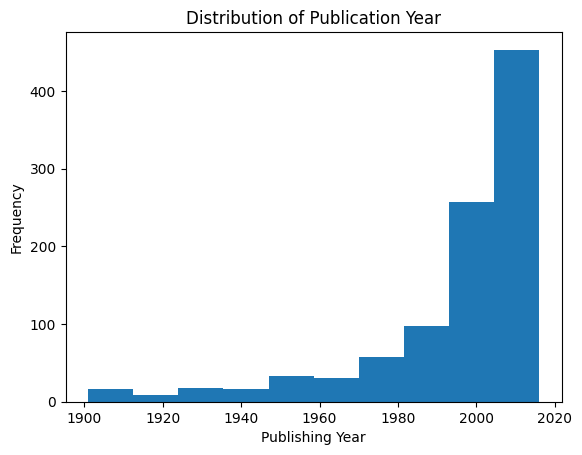

In [ ]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publication Year")
plt.show()

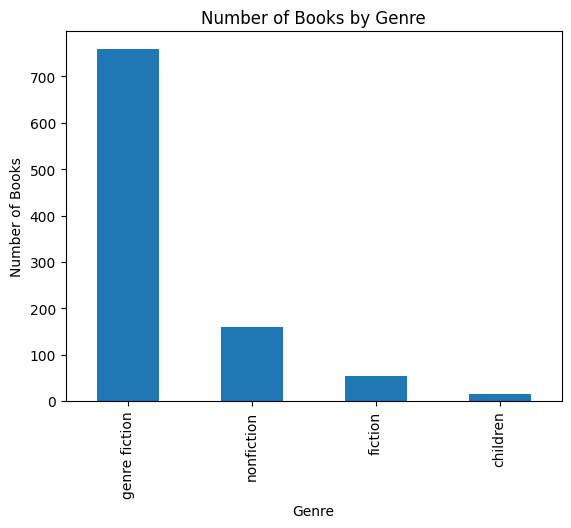

In [ ]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books by Genre")
plt.show()

In [ ]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


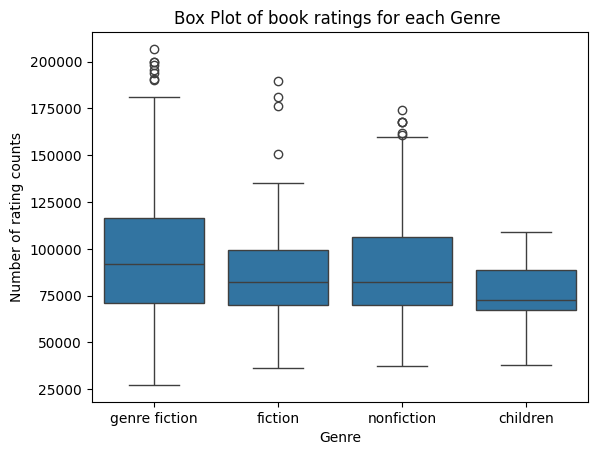

In [ ]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data= df)
plt.xlabel("Genre")
plt.ylabel("Number of rating counts")
plt.title("Box Plot of book ratings for each Genre ")
plt.show()

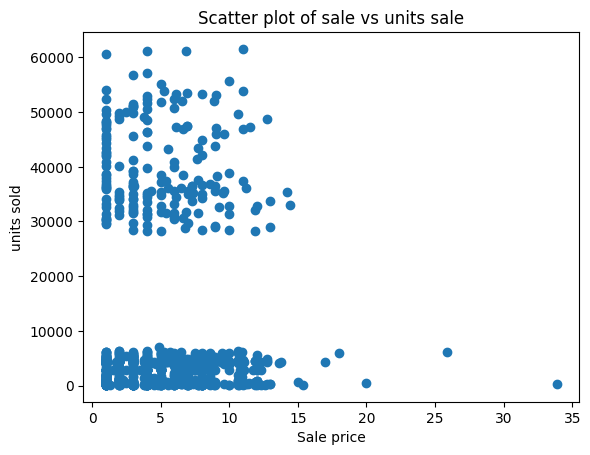

In [ ]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale price")
plt.ylabel("units sold")
plt.title("Scatter plot of sale vs units sale")
plt.show()

In [ ]:
language_counts = df["language_code"].value_counts()

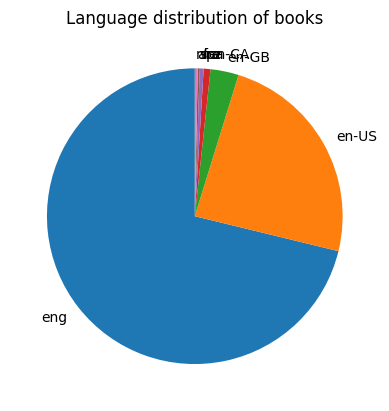

In [ ]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90)
plt.title("Language distribution of books")
plt.show()

In [ ]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [ ]:
df.groupby("language_code").size().sort_values(ascending=False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


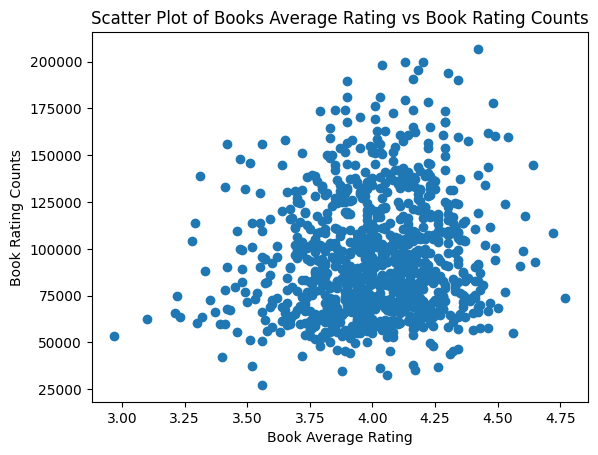

In [ ]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Rating Counts")
plt.title("Scatter Plot of Books Average Rating vs Book Rating Counts")
plt.show()

In [ ]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

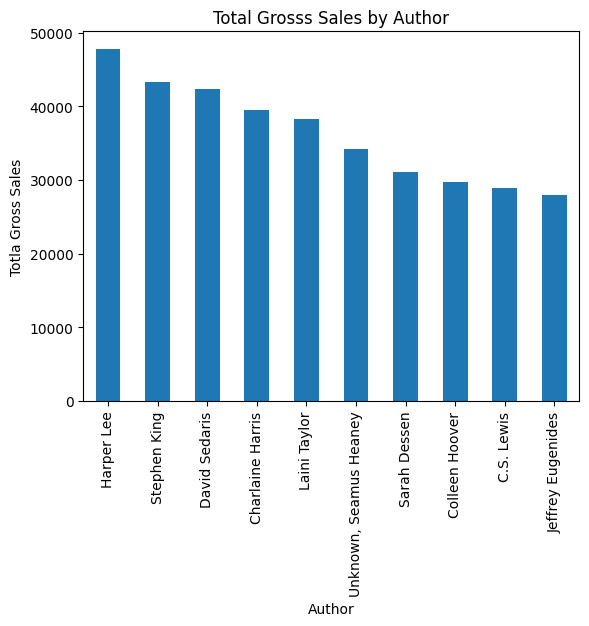

In [ ]:
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Totla Gross Sales")
plt.title("Total Grosss Sales by Author")
plt.show()

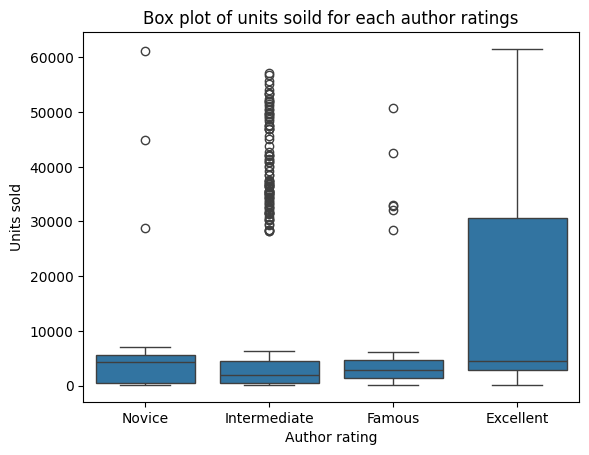

In [ ]:
sns.boxplot(x="Author_Rating", y= "units sold",data = df)
plt.xlabel("Author rating")
plt.ylabel("Units sold")
plt.title("Box plot of units soild for each author ratings")
plt.show()

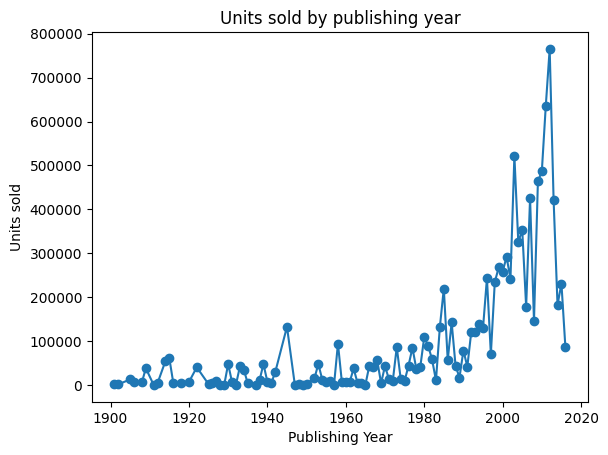

In [ ]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line",marker = "o")
plt.xlabel("Publishing Year")
plt.ylabel("Units sold")
plt.title("Units sold by publishing year")
plt.show()